In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import scipy.stats as stats

In [ ]:
folder = '08_03_18_varying_PEG_excess'
bucket = 'evanepst.data'
experiment = '100_4xs' #Used for naming purposes. Should exclude XY and well information

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('{}_XY{}'.format(experiment, '%02d' % num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track, prefix=experiment)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geoM2xy[sample_name], gSEM[sample_name] = msd.gavg_MSDs(sample_name, remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

In [2]:
folder = '08_03_18_varying_PEG_excess'
bucket = 'evanepst.data'
experiment = '100_pt25xs' #Used for naming purposes. Should exclude XY and well information

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('{}_XY{}'.format(experiment, '%02d' % num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track, prefix=experiment)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geoM2xy[sample_name], gSEM[sample_name] = msd.gavg_MSDs(sample_name, remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with 100_pt25xs_XY01
Done with 100_pt25xs_XY02
Done with 100_pt25xs_XY03
Done with 100_pt25xs_XY04
Done with 100_pt25xs_XY05
Done with 100_pt25xs_XY06
Done with 100_pt25xs_XY07
Done with 100_pt25xs_XY08
Done with 100_pt25xs_XY09
Done with 100_pt25xs_XY10
Done with 100_pt25xs_XY11
Done with 100_pt25xs_XY12
Done with 100_pt25xs_XY13
Done with 100_pt25xs_XY14
Done with 100_pt25xs_XY15
Done with 100_pt25xs_XY16
Done with 100_pt25xs_XY17
Done with 100_pt25xs_XY18
Done with 100_pt25xs_XY19
Done with 100_pt25xs_XY20


In [ ]:
gSEM

In [3]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

for key in bins:
    print(key)
    wo_slices[key], wh[key] = precision_weight(bins[key], gSEM)
    geo_slices[key], gSEM_slices[key], w_holder[key], gh[key] = precision_averaging(bins[key], geoM2xy, gSEM, wo_slices[key],
                                                            bucket=bucket, folder=folder, experiment=key) 

for key in geo_slices:
    geo_slices[key][geo_slices[key]==0.0] = np.nan
    gSEM_slices[key][gSEM_slices[key]==0.0] = np.nan
    
    geo_slices[key] = ma.masked_invalid(geo_slices[key])
    gSEM_slices[key] = ma.masked_invalid(gSEM_slices[key])
    
weights, wh1 = precision_weight(well_names, gSEM_slices)
geo, gS, w_holder1, gh1 = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

100_pt25xs_W0


/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:586: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:631: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:633: RuntimeWarning: divide by zero encountered in true_divide
  gSEM_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])


100_pt25xs_W1
100_pt25xs_W2
100_pt25xs_W3


In [4]:
geo

masked_array(data = [-- -2.5592518753276647 -1.887288181127393 -1.5059976426980306
 -1.2467663339827086 -1.0498908905060444 -0.8937292124126327
 -0.7632694005425682 -0.6534596818448752 -0.5581111544668765
 -0.4748470149798789 -0.4006783907979993 -0.3348303265963776
 -0.2752716996852173 -0.22160141205143286 -0.17274285297841582
 -0.12824582259287262 -0.08778039230716644 -0.05109220898802147
 -0.017513703207185306 0.010177595043135857 0.048486567869904386
 0.08513195349437244 0.1194769139817816 0.15222210302066114
 0.18303823659544755 0.21282907674322896 0.24175090483653044
 0.26955652829273824 0.2955245008988927 0.32071404639538664
 0.34532081413238147 0.3691205635439026 0.39097490280301767
 0.41284387358473246 0.4338034437882337 0.45407029257989134
 0.4739928218834982 0.49250128431323065 0.5110050571957675
 0.5280704726618701 0.5448355463305061 0.5620914265607638
 0.5790822145521558 0.5948555336428217 0.6099831495218173
 0.6254386497534669 0.6400719527566807 0.6543388068373559
 0.66807

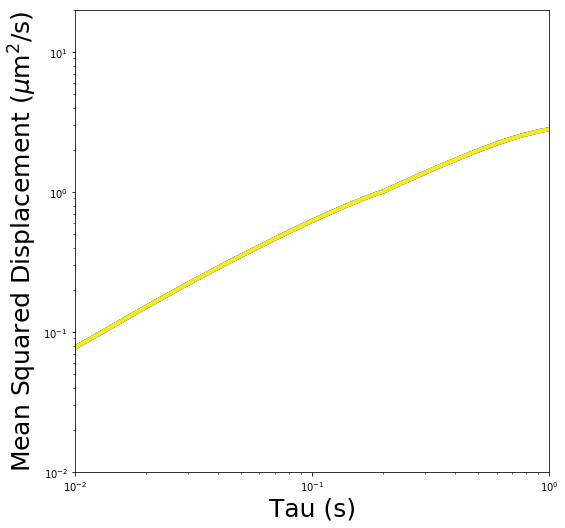

In [5]:
to_plot_f = [experiment, experiment, experiment, experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, yr=(10**-2, 10*2))

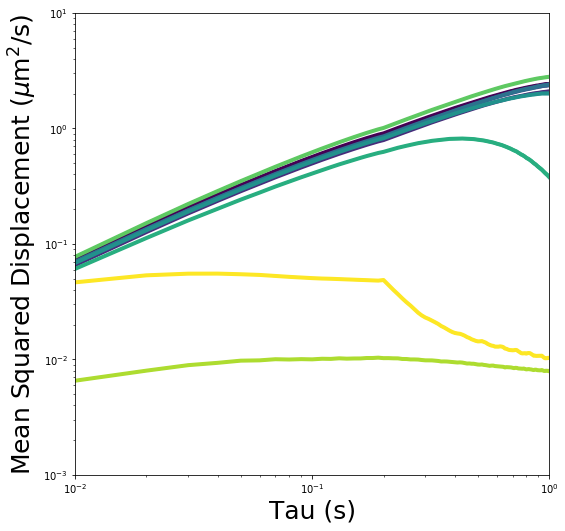

In [17]:
to_plot_f = ['100_4xs', '100_3xs', '100_2xs', '100_1xs', '100_pt75xs', '100_pt50xs', '100_pt25xs', '100_pt1xs', '100_PSCOOH']
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, yr=(10**-3, 10))

In [ ]:
to_plot = []
for key in geoM2xy:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
to_plot = []
for key in geo_slices:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
test = np.array([-5, -4, -3, -2, -1])
test = np.array([0.0001, 0.002, 0.03, 0.000005])
test2 = ma.log(test)
test2

In [ ]:
stats.sem(test)

In [ ]:
gSEM

In [ ]:
geoM2xy